# Neutron Star Units Check

This notebook is intended to check that the units and numbers for the static neutron star are correctly implemented in yt.

First we import the requisite modules

In [26]:
from __future__ import print_function
import yt

Next we load the data

In [3]:
base_dir='/home/jmiller/programming/simulationio-yt-tests'
source_dir=base_dir+'/'+'cactus'
fname='iof5-static-tov-cell-centred.s5'
fpath=source_dir+'/'+fname
configurationname='iteration.0000000000-timelevel.0'
ds = yt.load(fpath,
             configuration=configurationname)

yt : [INFO     ] 2016-12-09 14:10:17,052 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-09 14:10:17,054 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [INFO     ] 2016-12-09 14:10:17,056 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-12-09 14:10:17,058 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.02"
yt : [INFO     ] 2016-12-09 14:10:17,060 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.03"
yt : [INFO     ] 2016-12-09 14:10:17,062 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.04"
yt : [INFO     ] 2016-12-09 14:10:17,064 SimulationIO: CoordinateSystem "GRID-iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-09 14:10:17,070 SimulationIO: Field "GRID-iteration.0000000000-timelevel.0-x"
yt : [INFO     ] 2016-12-09 14:10:17,071 SimulationIO: Field "GRID-

## The Star Itself

We are interested in how the projection of the neutron star density behaves. A very compact neutron star like this one typically has a core density of
$$\rho_0 = 8\times 10^{17} kg/m^3$$
and a radius of 5 km or so. Let's look at our star.

In geometrized units, we use units of length given by
$$r_{geom}=\frac{G M_{\odot}}{c^2}$$
where $G\approx 6\times 10^{-11}$ $N m ^2/kg^2$ is Newton's constant, $c\approx 3\times 10^8$ $m/s$ is the speed of light, and $M_\odot \approx 2\times 10^30$ $kg$. (As an aside, $r_{geom}$ is half the Schwarzschild radius of the sun.)

We use $M_\odot$ for units of mass.

In [19]:
G=6.*10**(-11.)
c=3.*10**(8)
Msun=2*10**(30)
r_over_M=1*G*Msun/(c**2)
M_over_r=1.0/r_over_M
M_mks_to_geom=1./Msun
r_mks_to_geom=M_over_r

So this gives us a central density of (give or take a factor of 2)

In [27]:
rho_ns_mks = 8*10**17
rho_ns_geom = rho_ns_mks*M_mks_to_geom/(r_mks_to_geom**3)
print(rho_ns_geom*(10**3))

0.948148148148


Here's a zoomed in plot of the star:

yt : [INFO     ] 2016-12-09 14:21:40,010 Reading 3600 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-09 14:21:40,046 xlim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:21:40,048 ylim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:21:40,052 xlim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:21:40,053 ylim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:21:40,055 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



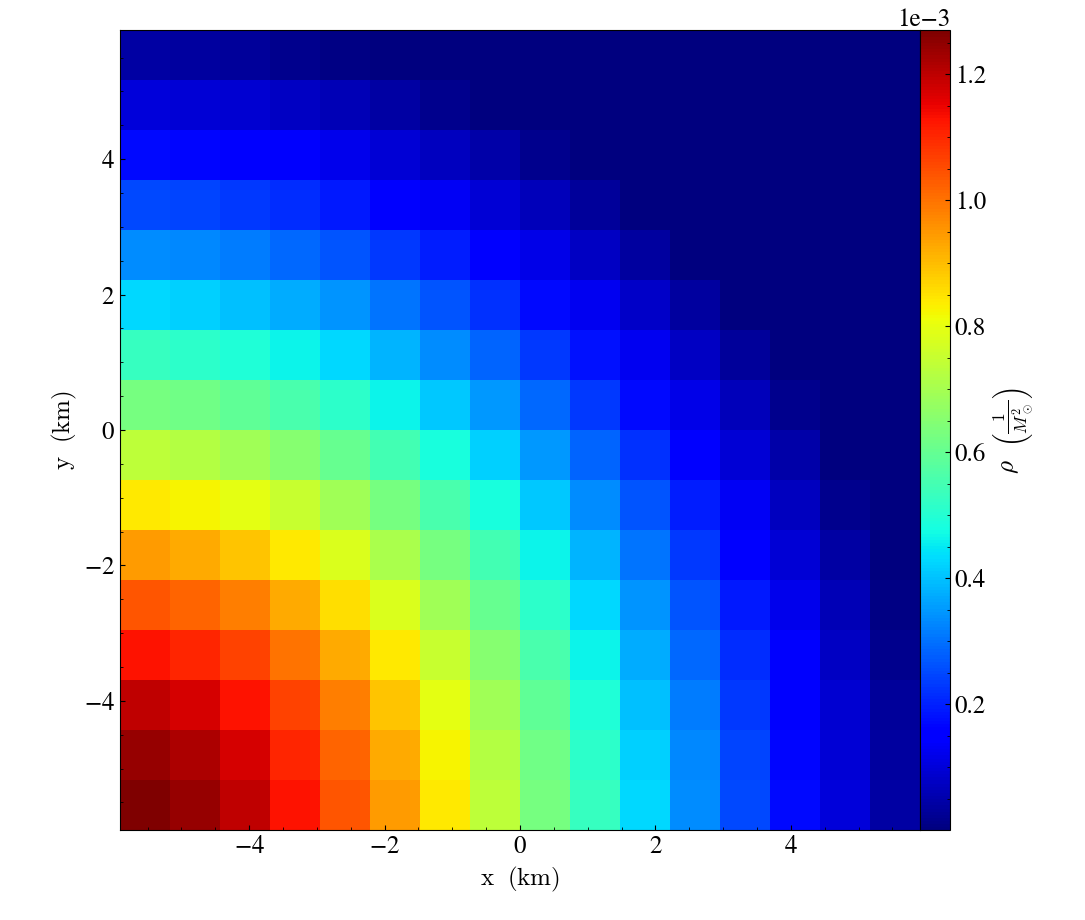

In [18]:
p = yt.SlicePlot(ds, "z", "density",center=[4,4,0],width=8)
p.set_cmap(field="all", cmap="jet")
p.set_log('density',False)
p.show()

Things look pretty good. The densest part of the star has a radius of about 2-2.5 km. The densest part of the star is roughly $1\times 10^{-3}$ $1/M_\odot^2$. But if we plot in log scale, we see a clear point where the star stops (at about 9 km out):

yt : [INFO     ] 2016-12-09 14:33:54,408 Reading 3600 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-09 14:33:54,447 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:33:54,448 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:33:54,451 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:33:54,453 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:33:54,455 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



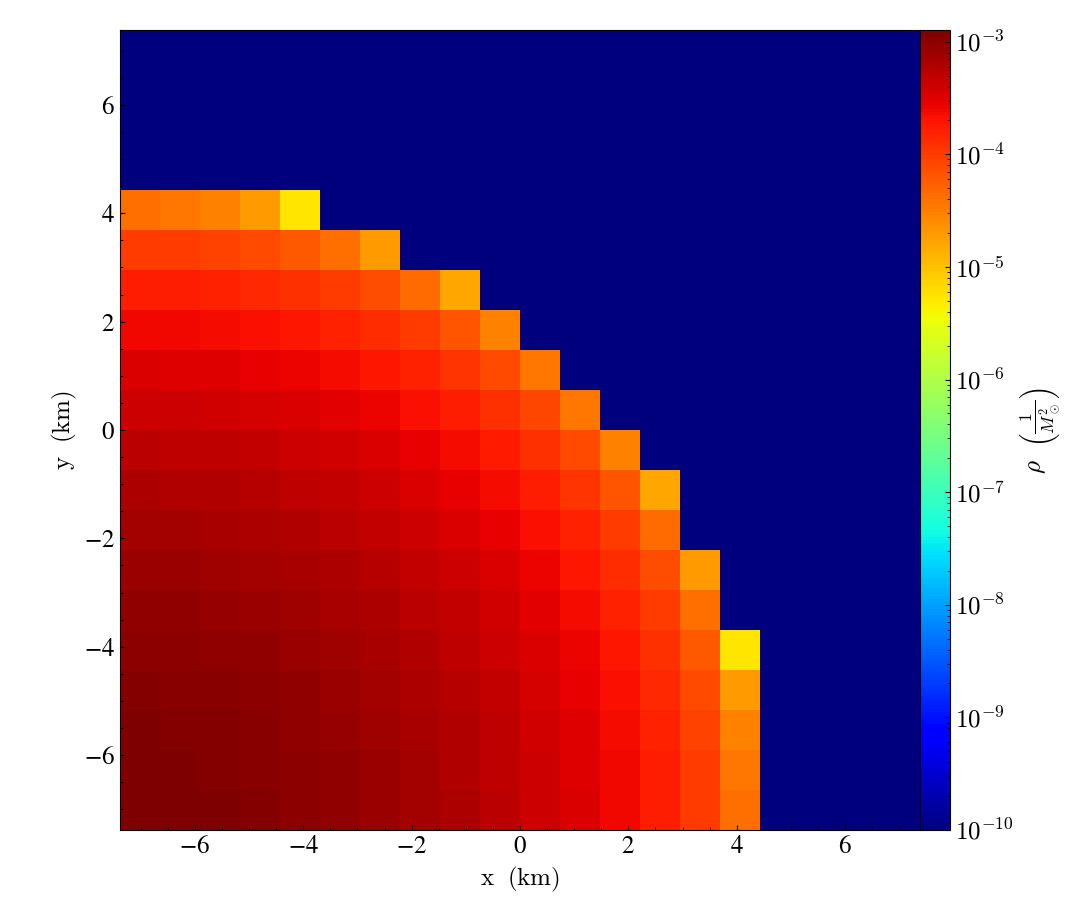

In [28]:
p = yt.SlicePlot(ds, "z", "density",center=[5,5,0],width=10)
p.set_cmap(field="all", cmap="jet")
p.set_log('density',True)
p.show()

## The Projection

Now let's see what happens when we project the star. Our expectation (based on very simplistic "step function" densities, is that the core of the star should integrage to something like
$$\sigma_0 = 2\rho_0 R_{core}$$
where $R_{core}$ is the radius of the core of the star.

yt : [INFO     ] 2016-12-09 14:28:35,014 Reading 121500 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-09 14:28:35,064 Projection completed
yt : [INFO     ] 2016-12-09 14:28:35,066 xlim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:28:35,068 ylim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:28:35,071 xlim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:28:35,072 ylim = 0.000000 8.000000
yt : [INFO     ] 2016-12-09 14:28:35,075 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



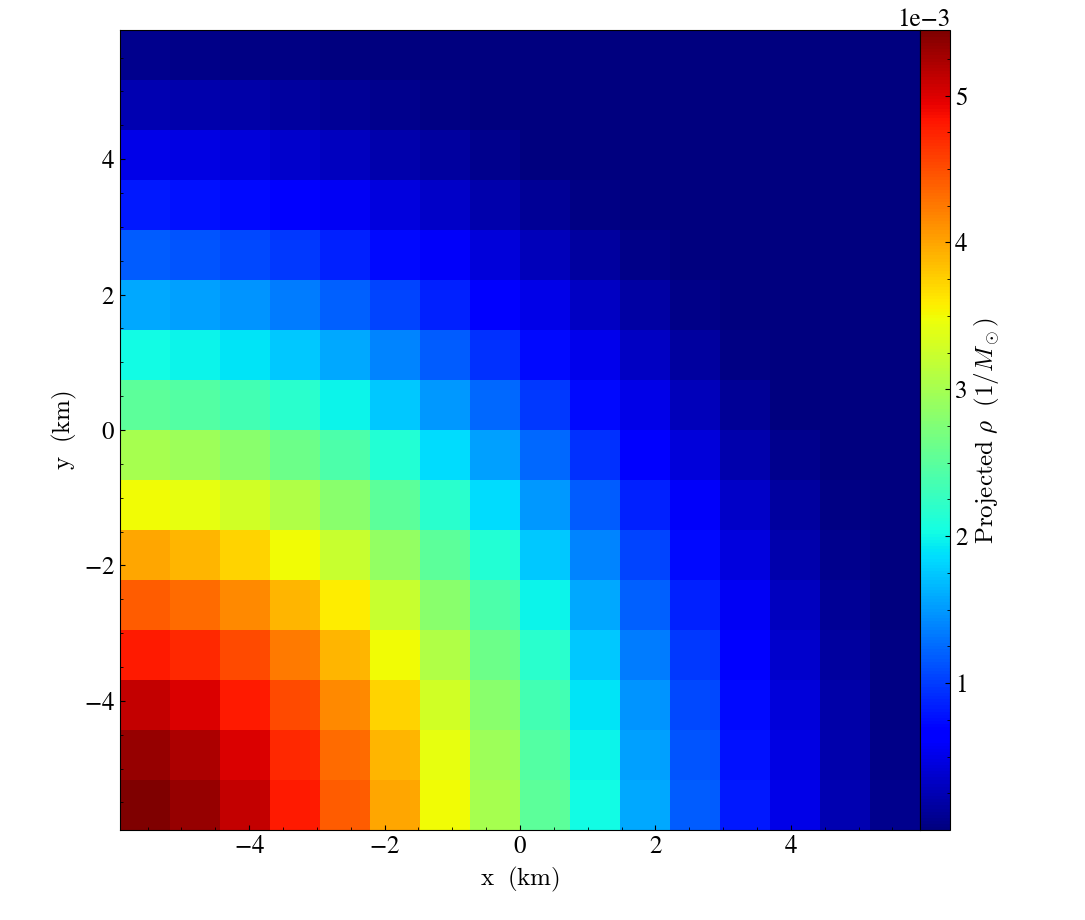

In [23]:
p = yt.ProjectionPlot(ds, "z", "density",center=[4,4,0],width=8)
p.set_cmap(field="all", cmap="jet")
p.set_log('density',False)
p.show()

And indeed our expectation is born out. We see that at the core of the star we have an integrated density of about $5\times 10^{-3}$, which is the diameter of the densest part of the star times the density there. On the other hand, if we view in log scale, we see the surface of the star is still clearly visible and delineated:

yt : [INFO     ] 2016-12-09 14:29:24,888 Reading 121500 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-09 14:29:24,946 Projection completed
yt : [INFO     ] 2016-12-09 14:29:24,947 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:29:24,949 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:29:24,952 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:29:24,954 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-09 14:29:24,957 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



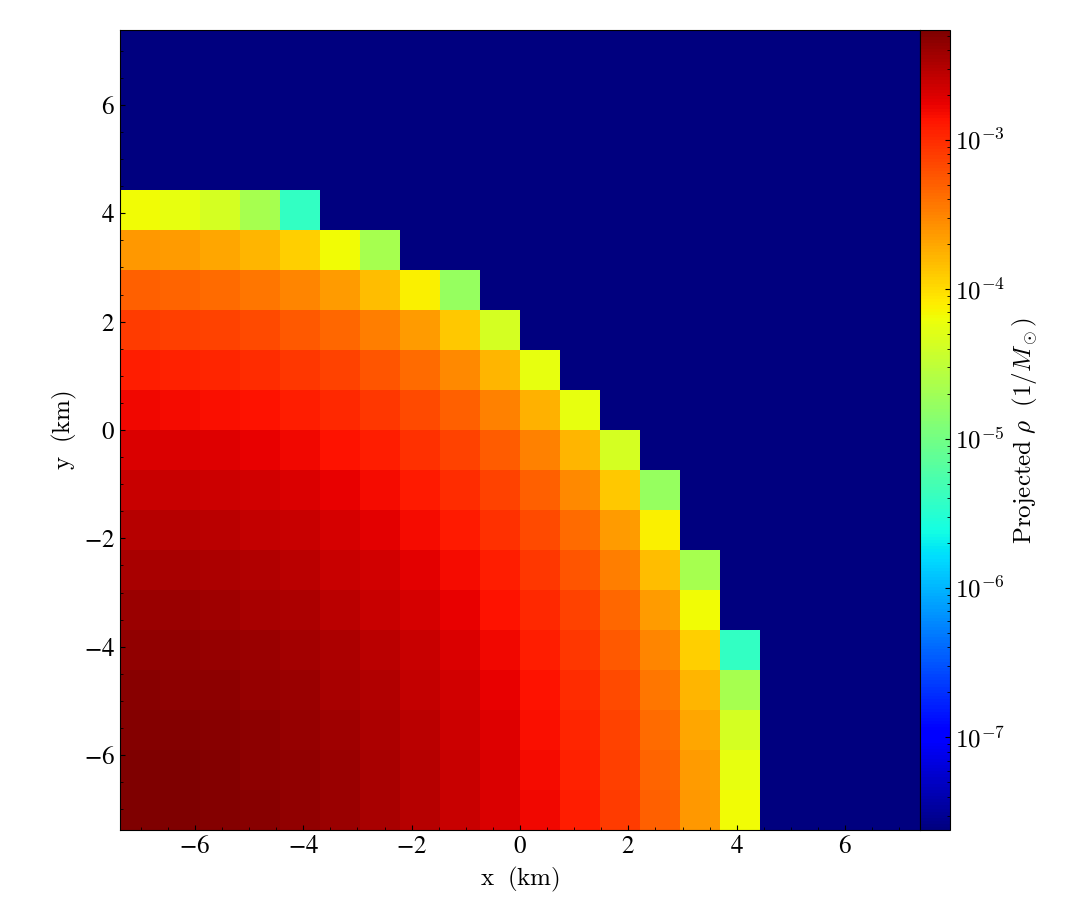

In [25]:
p = yt.ProjectionPlot(ds, "z", "density",center=[5,5,0],width=10)
p.set_cmap(field="all", cmap="jet")
p.set_log('density',True)
p.show()

## A more careful check

We can also check the integrated data more carefullly by outputting the data source.

In [37]:
p.set_log('density',False)
d = p.data_source['density']#*(10**(3))
print(d)

[  1.00000000e-10   1.00000000e-10   1.00000000e-10 ...,   1.00000000e-10
   1.00000000e-10   1.00000000e-10] m_geom/l_geom**3


Well that's not too helpfull... $10^{-10}$ is the density of the artifical atmosphere imposed by the code. Let's see if we can't do better.

In [41]:
print("Max of projected values: {} x 10^(-3)".format(
      d.max()*10**(3)))

Max of projected values: 1.2703464742 m_geom/l_geom**3 x 10^(-3)


And let's make sure there's nothing lower than the atmosphere:

In [42]:
print("Min of projected values: ",
     d.min())

Min of projected values:  1e-10 m_geom/l_geom**3


Looks good to me!